In [11]:
#required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [12]:
#csv file load
soil_data = pd.read_csv('soil.csv')
soil_data

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...,...
668,Birbhum,93.95,100.00,98.63,97.06,78.52,22.07
669,KALIMPONG,100.00,100.00,100.00,84.81,100.00,62.50
670,Maldah,98.56,93.78,97.61,68.60,81.34,44.98
671,Murshidabad,96.36,99.59,100.00,94.31,87.85,36.84


In [13]:
#drop the training example with missing rows
soil_data.dropna(inplace=True)
soil_data

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...,...
668,Birbhum,93.95,100.00,98.63,97.06,78.52,22.07
669,KALIMPONG,100.00,100.00,100.00,84.81,100.00,62.50
670,Maldah,98.56,93.78,97.61,68.60,81.34,44.98
671,Murshidabad,96.36,99.59,100.00,94.31,87.85,36.84


In [14]:
#drop the district column
soil_data = soil_data.drop('District ', axis=1)
soil_data

,Zn %,Fe%,Cu %,Mn %,B %,S %
0,67.67,65.14,91.88,77.70,73.54,85.90
1,80.51,78.19,99.77,91.82,89.04,88.62
2,79.27,88.14,95.54,97.24,88.05,95.67
3,58.30,71.16,98.86,91.40,86.15,86.81
4,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...
668,93.95,100.00,98.63,97.06,78.52,22.07
669,100.00,100.00,100.00,84.81,100.00,62.50
670,98.56,93.78,97.61,68.60,81.34,44.98
671,96.36,99.59,100.00,94.31,87.85,36.84


In [48]:
#randomly select 155 examples
soil_data = soil_data.sample(n=155)
soil_data

,Zn %,Fe%,Cu %,Mn %,B %,S %
202,86.95,97.71,99.67,71.16,10.22,80.24
261,59.91,84.35,97.63,98.38,54.92,74.53
110,74.54,96.48,98.45,93.32,86.97,88.01
365,54.88,54.98,95.81,87.42,76.54,70.21
562,43.12,57.85,95.88,88.17,85.84,89.99
...,...,...,...,...,...,...
345,46.29,23.54,99.38,98.08,75.63,58.60
629,67.11,94.09,95.42,97.67,62.74,78.21
501,54.41,3.49,96.17,7.01,26.96,0.17
231,84.78,97.34,96.89,99.67,61.45,85.11


In [71]:
soil_data.columns

Index(['Zn %', 'Fe%', 'Cu %', 'Mn %', 'B %', 'S %'], dtype='object')

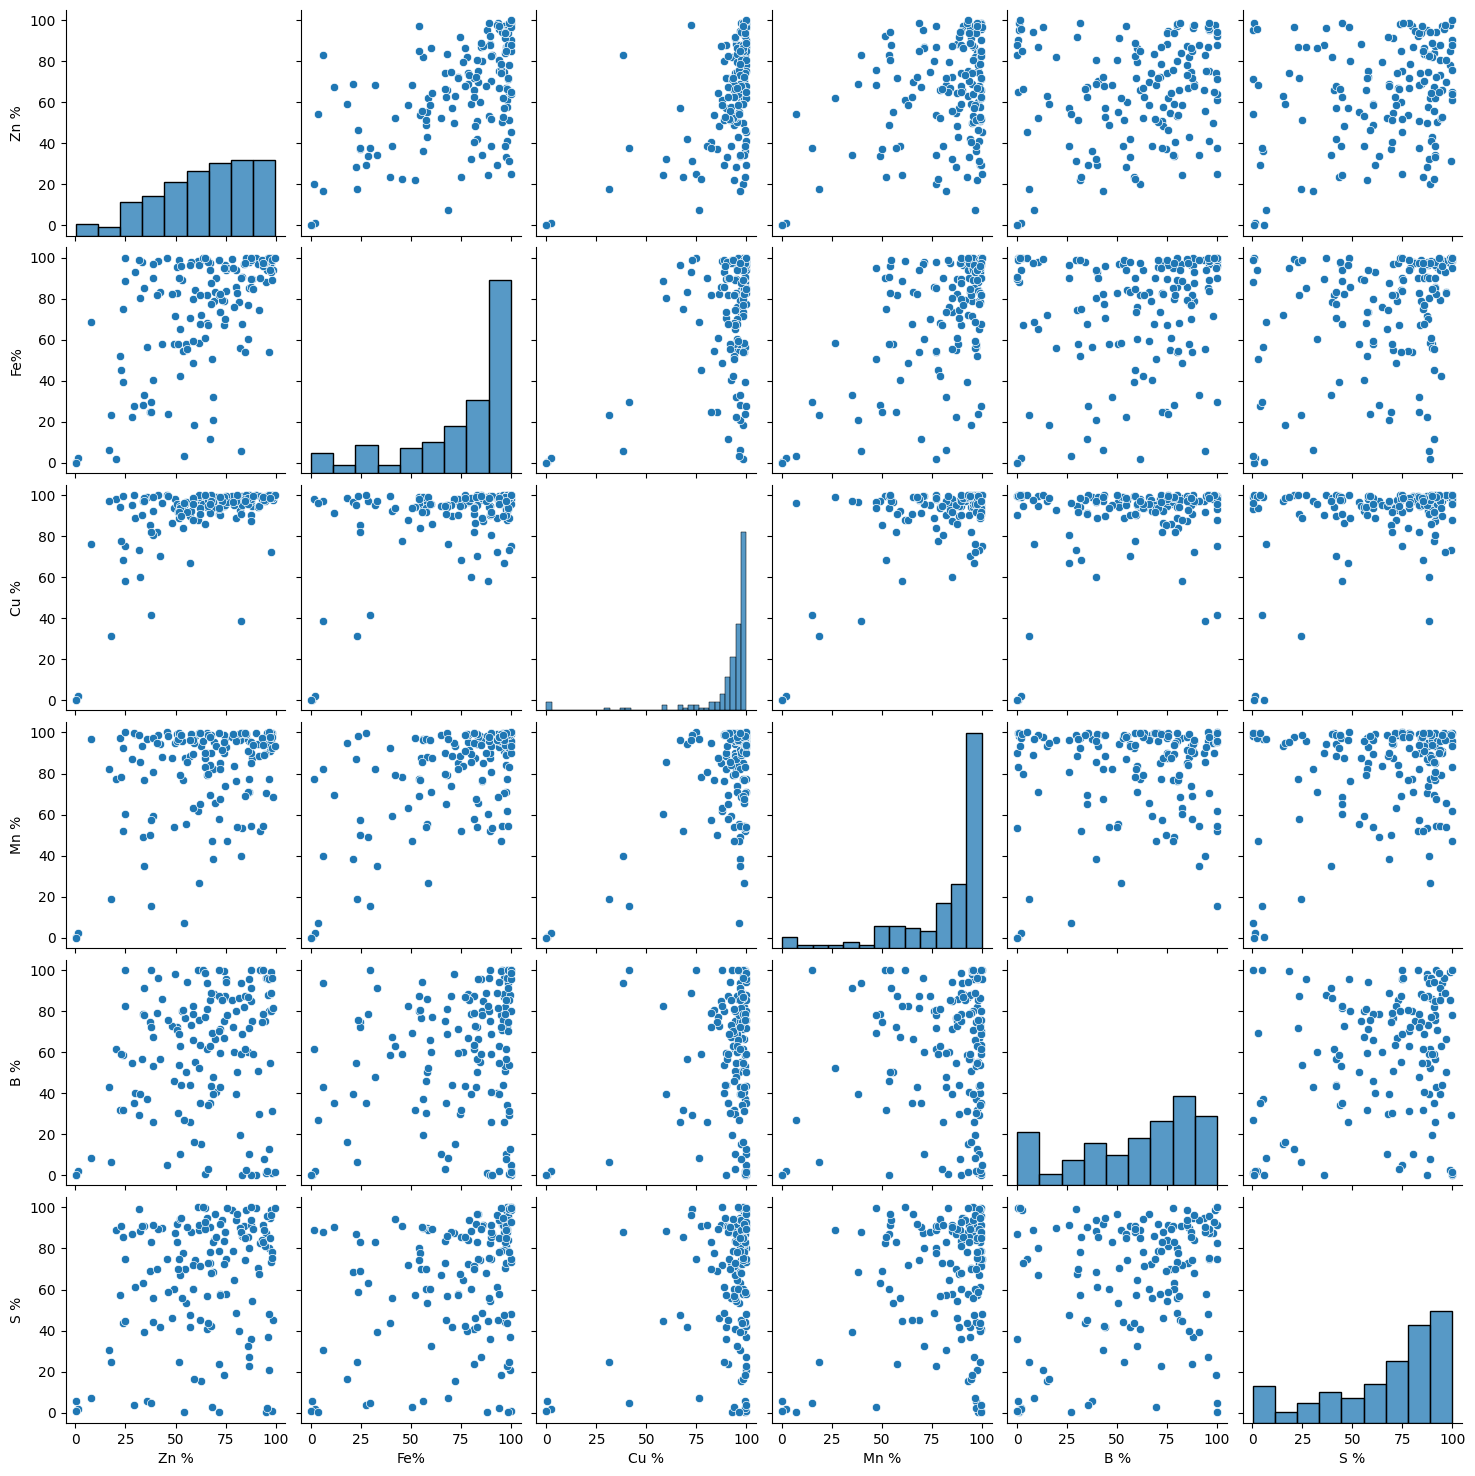

In [49]:
sns.pairplot(soil_data)

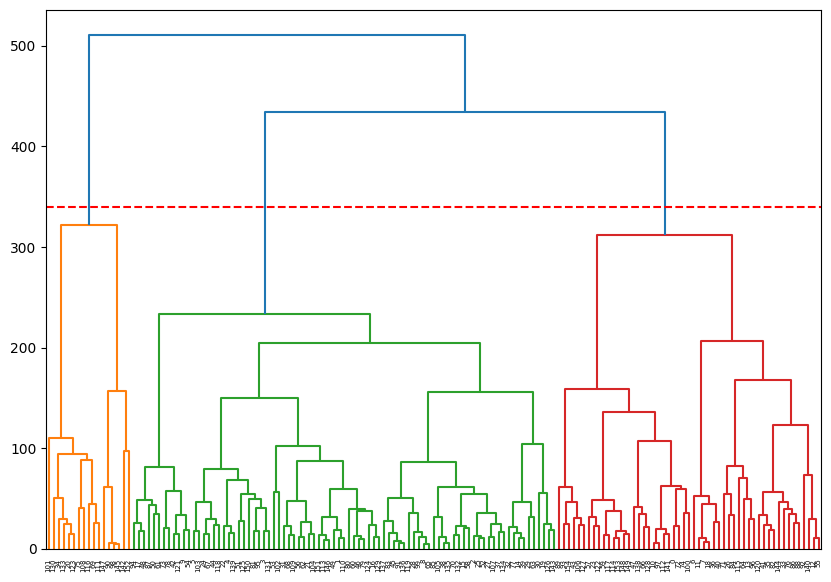

In [121]:
#Drawing the dendogram
plt.figure(figsize=(10, 7)) 
clusters = shc.linkage(soil_data,method = 'ward')
shc.dendrogram(clusters)
plt.axhline(y = 340, color = 'r', linestyle = '--')

We can clearly see from dendogram that the number of clusters is 3 because the longest vertical line exist when the number of clusters is 3 and so there is the break line.

# Single linkage


In [99]:
clustering_model_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
clustering_model_1.fit(soil_data)
data_labels_1 = clustering_model_1.labels_

Text(0.5, 1.0, 'Labeled Soil Data')

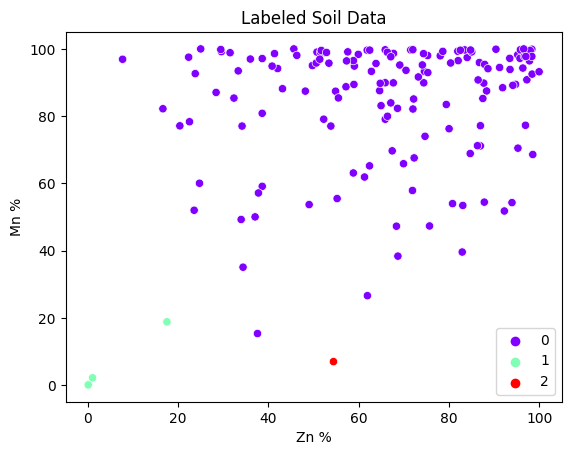

In [122]:
#plotting the data with showing the clusters
sns.scatterplot(x='Zn %', 
                y='Mn %', 
                data=soil_data, 
                hue=data_labels_1,
                palette="rainbow").set_title('Labeled Soil Data')

# Complete linkage

In [101]:
clustering_model_2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clustering_model_2.fit(soil_data)
data_labels_2 = clustering_model_2.labels_

Text(0.5, 1.0, 'Labeled Soil Data')

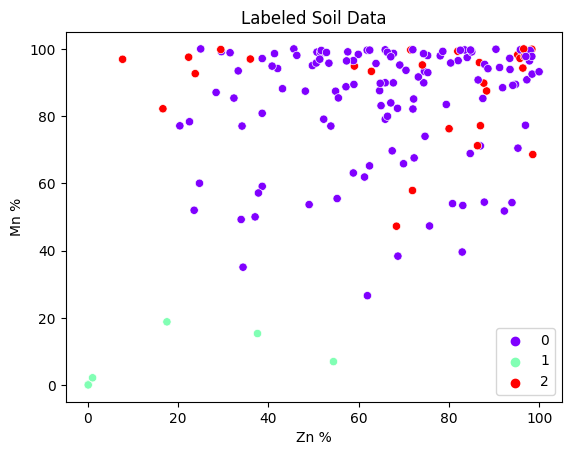

In [123]:
#plotting the data with showing the clusters
sns.scatterplot(x='Zn %', 
                y='Mn %', 
                data=soil_data, 
                hue=data_labels_2,
                palette="rainbow").set_title('Labeled Soil Data')

# Average linkage

In [109]:
clustering_model_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
clustering_model_3.fit(soil_data)
data_labels_3 = clustering_model_3.labels_

Text(0.5, 1.0, 'Labeled Soil Data')

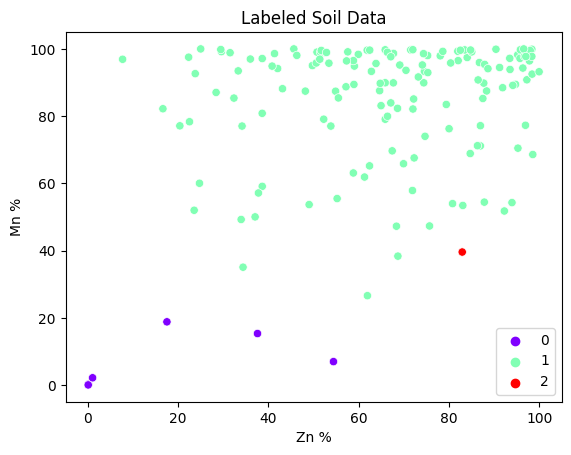

In [124]:
#plotting the data with showing the clusters
sns.scatterplot(x='Zn %', 
                y='Mn %', 
                data=soil_data, 
                hue=data_labels_3,
                palette="rainbow").set_title('Labeled Soil Data')

# Ward linkage

In [115]:
clustering_model_4 = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
clustering_model_4.fit(soil_data)
data_labels_4 = clustering_model_4.labels_

Text(0.5, 1.0, 'Labeled Soil Data')

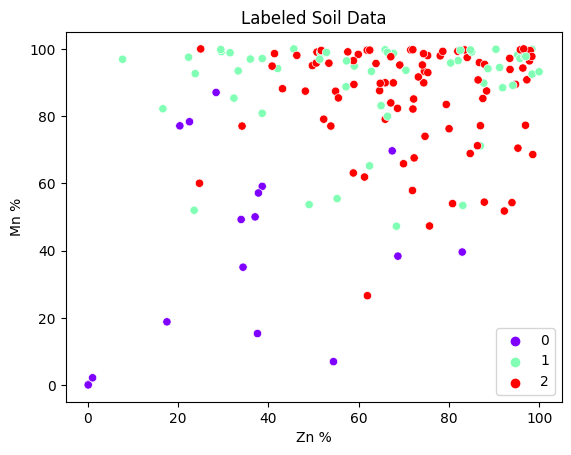

In [120]:
#plotting the data with showing the clusters
sns.scatterplot(x='Zn %', 
                y='Mn %', 
                data=soil_data, 
                hue=data_labels_4,
                palette="rainbow").set_title('Labeled Soil Data')